In [2]:
import json
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


# 1.对评论数据以及评论对应的新闻数据进行预处理

In [3]:
# 获得评论数据
comment_path_ori = './news/comment' # 评论文件存放路径
comment_data = []
for i in os.listdir(comment_path_ori):
    comment_path = os.path.join(comment_path_ori, i)
    with open(comment_path, 'r', encoding='utf-8') as f:
        datas = json.load(f)
        for data in datas:
            comment_len = len(data['comment'])
            # 只提取有评论的数据
            for j in range(comment_len): 
                dic = {}
                dic['新闻发布日期'] = '2020-' + data['time'].split()[0]
                dic['新闻发布时间'] = data['time'].split()[1]
                dic['新闻标题'] = data['title']
                dic['新闻url'] = data['url']
                dic['评论发布区域'] = data['comment'][j]['area']
                dic['评论内容'] = data['comment'][j]['content']
                dic['评论发布者id'] = data['comment'][j]['nickname']
                dic['评论回复id'] = data['comment'][j]['reply_to']
                dic['评论发布日期'] = data['comment'][j]['time'].split()[0]
                dic['评论发布时间'] = data['comment'][j]['time'].split()[1]
                comment_data.append(dic)
print('合计获取到{}条新闻评论数据'.format(len(comment_data)))

合计获取到1534616条新闻评论数据


In [4]:
# 转成DataFrame格式，对数据进行去重
comment_data_df = pd.DataFrame(comment_data)
# 去除空数据
comment_data_df.dropna()
comment_data_df = comment_data_df[comment_data_df['评论发布区域']!='']
comment_data_df = comment_data_df[comment_data_df['评论内容']!='']
comment_data_df.drop_duplicates(inplace=True)

print('去重后，剩余{}条新闻评论数据'.format(len(comment_data_df)))
comment_data_df.head()

去重后，剩余1527884条新闻评论数据


,新闻发布日期,新闻发布时间,新闻标题,新闻url,评论发布区域,评论内容,评论发布者id,评论回复id,评论发布日期,评论发布时间
0,2020-02-27,02:32,英媒：中国养蜂人遭“封锁” 新冠病毒“蜇疼”蜂蜜生产国,https://finance.sina.com.cn/chanjing/cyxw/2020...,上海,应该对健康的养蜂人网开一面，不能因噎废食！,ljg19511110,,2020-02-28,11:08:19
1,2020-02-27,02:32,英媒：中国养蜂人遭“封锁” 新冠病毒“蜇疼”蜂蜜生产国,https://finance.sina.com.cn/chanjing/cyxw/2020...,辽宁大连,政策难以想到方方面面啊,用户5171625849,,2020-02-28,09:38:51
2,2020-02-27,02:32,英媒：中国养蜂人遭“封锁” 新冠病毒“蜇疼”蜂蜜生产国,https://finance.sina.com.cn/chanjing/cyxw/2020...,北京,蜜蜂感染了冠状病毒怎么办？,用户6485007919,,2020-02-28,03:32:49
3,2020-02-27,02:32,英媒：中国养蜂人遭“封锁” 新冠病毒“蜇疼”蜂蜜生产国,https://finance.sina.com.cn/chanjing/cyxw/2020...,广西南宁,对于一毛不拨的想都别想，只想尽可能以最低成本,复古电风扇,用户5171625849,2020-02-28,11:06:29
4,2020-02-27,02:32,英媒：中国养蜂人遭“封锁” 新冠病毒“蜇疼”蜂蜜生产国,https://finance.sina.com.cn/chanjing/cyxw/2020...,广东深圳,蜜蜂不会。蜜蜂又不是腐乳动物~,用户v6xu1xcswl,用户6485007919,2020-02-28,06:59:55


In [7]:
# 读取已处理好的新闻正文关键词
news_data_keyword = pd.read_csv('./news/preprocess_data/新闻正文关键词.csv')
# 将有问题的关键词剔除
keyword_not_need = []
with open('./news/preprocess_data/关键词-需剔除.txt', 'r') as f:
    for line in f:
        keyword_not_need.append(line.strip())
def filter_keyword(keywords):
    keywords = keywords.split()
    keywords = np.setdiff1d(np.array(keywords), np.array(keyword_not_need))
    return ' '.join(keywords)
news_data_keyword['新闻关键词'] = news_data_keyword['新闻关键词'].map(filter_keyword)

In [8]:
news_data_keyword.head()

,新闻发布日期,新闻url,新闻关键词,新闻标题
0,2020-02-27,https://finance.sina.com.cn/money/future/roll/...,PTA 下行,弱成本&amp;弱供需PTA顺势下行
1,2020-02-27,https://finance.sina.com.cn/chanjing/cyxw/2020...,新冠肺炎 疫情,英媒：中国养蜂人遭“封锁”新冠病毒“蜇疼”蜂蜜生产国
2,2020-02-27,https://finance.sina.com.cn/world/gjjj/2020-02...,中国 人数 富豪 美国 身价,美媒：中国超级富豪人数超过美印之和
3,2020-02-27,https://finance.sina.com.cn/world/gjjj/2020-02...,新冠肺炎 野生动物,英媒：疫情导致中国的野生动物养殖面临困境
4,2020-02-27,https://news.sina.com.cn/w/2020-02-27/doc-iimx...,印度,印度：停职官员要坐“反省椅”等待最后“判决”


In [9]:
# 筛选有评论数据的新闻文本
# 对新闻评论数据中的新闻url进行去重，得到有评论的新闻url，并使用该新闻url数据对新闻文本关键词数据进行筛选
# 获得新闻评论数据中的去重url
urls_unique = comment_data_df['新闻url'].unique()
# 筛选出有评论数据的新闻文本关键词数据
news_data_keyword_have_commment = news_data_keyword[news_data_keyword['新闻url'].isin(urls_unique)]
print('有评论的新闻文本数据有{}条，总共的新闻评论数为{}条，一条新闻平均有{}条评论'.format(
    len(news_data_keyword_have_commment), len(comment_data_df), 
    len(comment_data_df) / len(news_data_keyword_have_commment)))

有评论的新闻文本数据有58881条，总共的新闻评论数为1527884条，一条新闻平均有25.94867614340789条评论


# 2.提取出跟疫情相关的新闻
对新闻文本关键词数据中的关键词进行筛选，提取出跟疫情有关的关键词，并使用这些关键词提取出相关新闻url

In [10]:
# 提取到所有的关键词
all_news_keyword = set()
for keywords in news_data_keyword_have_commment['新闻关键词']:
    for keyword in keywords.split():
        all_news_keyword.add(keyword)
with open('./news/preprocess_data/all_keywords_have_comment.txt', 'w', encoding='utf8') as f:
    for i in all_news_keyword:
        f.write('{}\n'.format(i))

In [11]:
# 在all_keywords_have_comment.txt中筛选出跟疫情相关的319关键词，存储在疫情相关关键词.txt中
yiqing_keyword = []
with open('./news/preprocess_data/疫情相关关键词.txt', 'r', encoding='utf8') as f:
    for line in f:
        yiqing_keyword.append(line.strip())

In [12]:
# 通过获取到的319个疫情相关关键词，提取跟疫情相关的新闻url
def is_yiqing_keyword(keywords):
    is_in = False
    for i in keywords.split():
        if i in yiqing_keyword:
            is_in = True
    return is_in
news_data_keyword_have_commment_yiqing = news_data_keyword_have_commment[news_data_keyword_have_commment['新闻关键词'].apply(is_yiqing_keyword)]
print('通过疫情关键词，总共筛选出{}条新闻文本数据'.format(len(news_data_keyword_have_commment_yiqing)))

通过疫情关键词，总共筛选出21348条新闻文本数据


In [14]:
# 由于关键词筛选出的疫情新闻文本中仍然存在一定的偏差(例如1月初期)，因此还需要对新闻数据进行筛选，最终获得21231篇疫情新闻文本
news_data_keyword_have_commment_yiqing = pd.read_csv('./news/preprocess_data/疫情相关新闻正文关键词-已筛选.csv')

# 3.根据提取出的与疫情相关的新闻数据，提取出对应的评论数据，并对评论数据进行清洗

In [15]:
# 根据提取到的疫情相关的url，提取出这些新闻url对应的评论数据
comment_data_yiqing = comment_data_df[comment_data_df['新闻url'].isin(news_data_keyword_have_commment_yiqing['新闻url'].unique())]
print('总共提取到{}条疫情相关的新闻评论'.format(len(comment_data_yiqing)))

总共提取到587851条疫情相关的新闻评论


In [16]:
# 剔除评论数据中的异常字符，例如emoji表情包
def filter_emoji(desstr, restr=''):  
    # 过滤emoji表情   
    try:  
        co = re.compile(u'[\U00010000-\U0010ffff]')  
    except re.error:
        co = re.compile(u'[\uD800-\uDBFF][\uDC00-\uDFFF]')
    return co.sub(restr, desstr)
comment_data_yiqing['评论内容'] = comment_data_yiqing['评论内容'].apply(filter_emoji)

/Users/apple/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [17]:
# 过滤[good]、[doge]这类表情包
def filter_another_emoticon(comment):
    return re.sub(r'\[.*?\]', '', comment)
comment_data_yiqing['评论内容'] = comment_data_yiqing['评论内容'].apply(filter_another_emoticon)

/Users/apple/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# 4.对疫情相关新闻评论数据进行描述性统计分析

## 4.1疫情相关新闻评论数据中的发布日期的分布

In [18]:
news_data_riqi = comment_data_yiqing['评论发布日期'].value_counts()
news_data_riqi.sort_index(ascending=True, inplace=True)
news_data_riqi

2020-01-01     63
2020-01-02    349
2020-01-03    158
2020-01-04    123
2020-01-05    183
             ... 
2020-08-31      4
2020-09-01      1
2020-09-02      6
2020-09-04      2
2020-09-05      3
Name: 评论发布日期, Length: 225, dtype: int64

In [19]:
# 发现除了01-01到03-08期间发布的评论外，还有很多评论是03-08之后，但是这些评论的数量仅占总评论数量的1.5%，因此考虑剔除
len(comment_data_yiqing[comment_data_yiqing['评论发布日期']>'2020-03-08']) / len(comment_data_yiqing)

0.01505653643525315

In [20]:
# 仅保留评论发布日期在01-01到03-08之间的评论数据
comment_data_yiqing = comment_data_yiqing[comment_data_yiqing['评论发布日期']<='2020-03-08']
print('2020-01-01至2020-03-08期间发布的评论数量为{}条'.format(len(comment_data_yiqing)))

2020-01-01至2020-03-08期间发布的评论数量为579000条


In [21]:
# 制作每日评论数量折线图所需的数据
comment_date_data = comment_data_yiqing['评论发布日期'].value_counts()
comment_date_data.sort_index(ascending=True, inplace=True)

In [85]:
with open('./report/echarts图表/js/comment_date.js', 'w', encoding='utf8') as f:
    f.write('const comment_date = ')
    f.write(str(list(comment_date_data.index)))

In [86]:
with open('./report/echarts图表/js/comment_date_data.js', 'w', encoding='utf8') as f:
    f.write('const comment_date_data = ')
    f.write(str(list(comment_date_data.values)))

- 可以看出，在1-21开始，针对疫情的评论明显开始增多
- 从1-21到3-8期间，针对疫情的每日评论数量基本维持在了10000以上
- 在1-31至2-2期间，达到每天15000+的评论数，为当时讨论的高峰期
- 具体可见`report/echarts图表/每日新闻评论数量折线图.html`
![](img/2022-03-11-08-27-32.png)

## 4.2疫情相关新闻评论数据的地域分布

In [25]:
# 由于评论数据中的评论发布区域中包含有很多噪音数据，因此，我们仅统计包含全国34个省、直辖市、自治区名称的地域数据
province_name = ['北京', '天津', '上海', '重庆', '河北', '河南', '云南', '辽宁', '黑龙江', '湖南', '安徽', '山东', '新疆',
                 '江苏', '浙江', '江西', '湖北', '广西', '甘肃', '山西', '内蒙古', '陕西', '吉林', '福建', '贵州', '广东',
                 '青海', '西藏', '四川', '宁夏', '海南', '台湾', '香港', '澳门']

In [26]:
# 筛选评论发布区域包含province_name的评论数据
def is_in_province_name(area):
    is_in = False
    for i in province_name:
        if i in area:
            is_in = True
    return is_in
comment_province_data = comment_data_yiqing[comment_data_yiqing['评论发布区域'].map(is_in_province_name)]
print('经过地域筛选后，还剩{}条评论数据'.format(len(comment_province_data)))

经过地域筛选后，还剩559254条评论数据


In [27]:
# 将不同的地域统一到省级，如浙江杭州、浙江宁波都统一为浙江
def get_area(area):
    name = ''
    for i in province_name:
        if i in area:
            name = i
    return name
comment_province_data['评论发布地'] = comment_province_data['评论发布区域'].map(get_area)

/Users/apple/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
# 统计各个地区的评论数量
comment_province = comment_province_data['评论发布地'].value_counts()

In [87]:
comment_province

北京     84693
广东     52953
山东     36551
江苏     36530
浙江     30197
上海     30141
湖北     26642
四川     24804
河南     23188
河北     22722
辽宁     20251
安徽     16605
江西     13709
湖南     13371
陕西     12871
广西     12765
福建     11965
黑龙江    11316
天津     11171
重庆     11130
山西      9950
吉林      8146
云南      6942
内蒙古     6506
贵州      5122
甘肃      4480
新疆      4478
海南      4304
宁夏      1857
香港      1403
青海      1104
台湾       967
西藏       249
澳门       171
Name: 评论发布地, dtype: int64

In [89]:
# 制作地图所需的数据
with open('./report/echarts图表/js/comment_area_data.js', 'w', encoding='utf8') as f:
    lst = []
    for i in range(len(comment_province)):
        dic = {}
        dic['name'] = comment_province.index[i]
        dic['value'] = comment_province.values[i]
        lst.append(dic)
    f.write('const comment_area_data = ')
    f.write(str(lst))

- 可以看出，评论的地域分布，还是集中在北京、上海、广东、山东、江苏、浙江等人口较多的地区
- 具体见`report/echarts图表/新闻评论数量地域分布.html`
![](img/2022-03-11-08-34-25.png)

# 5. 针对疫情相关新闻的评论数据的情感分析

In [30]:
# 对评论内容的字数长度进行统计，发现存在一部分离散值
comment_data_yiqing['评论内容'].apply(lambda x: len(x)).describe()

count    579000.000000
mean         23.014801
std          30.089891
min           0.000000
25%           7.000000
50%          14.000000
75%          28.000000
max        2421.000000
Name: 评论内容, dtype: float64

(array([195416., 165152.,  84913.,  46084.,  27306.,  17364.,  11529.,
          7965.,   5590.,   4028.,   2843.,   2191.,   1645.,   1561.,
          1257.,    678.,    535.,    431.,    393.,    351.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200.]),
 <a list of 20 Patch objects>)

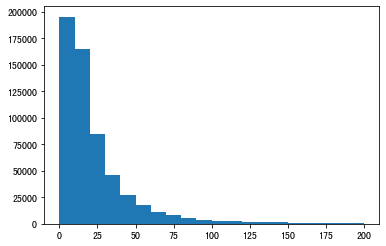

In [31]:
# 可以看到评论长度基本在125字以下
plt.hist(comment_data_yiqing['评论内容'].apply(lambda x: len(x)), bins=20, range=(0, 200))

In [32]:
# 对大于125的评论数据进行剔除
comment_data_yiqing_limit = comment_data_yiqing[(comment_data_yiqing['评论内容'].apply(lambda x: len(x))<=125) ]
print(len(comment_data_yiqing_limit))

571389


In [63]:
# 另外，评论中存在一部分空值、一些换行符，也需要进行剔除
comment_data_yiqing_limit = comment_data_yiqing_limit[comment_data_yiqing_limit['评论内容']!='']
def remove_null(strs):
    return strs.strip().replace(' ', '').replace('\n', '').replace('\t', '').replace(' \r', '').replace(',', '，')
comment_data_yiqing_limit['评论内容'] = comment_data_yiqing_limit['评论内容'].apply(lambda x: remove_null(x))
len(comment_data_yiqing_limit)

/Users/apple/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


564428

## 由于本次分析的新闻评论数据与weibo_senti_100k比较类似，因此使用BERT模型对weibo_senti_100k数据进行训练，获得相应的情感分类模型，并使用该模型对新闻评论进行情感分类(考虑到weibo_senti_100k仅标注了正面情绪与负面情绪，因此本次新闻评论情感分类仅进行正负倾向的区分)
- weibo_senti_100k数据集见`data`目录
- 模型训练代码见`sentiment_classification`目录

In [64]:
comment_data_yiqing_limit.to_csv('./news/preprocess_data/疫情新闻评论_筛选.csv', index=False)

In [71]:
# 使用`sentiment_classification/predict.py`脚本对疫情新闻评论_筛选.csv中的新闻评论进行情感倾向预测
comment_data_yiqing_limit = pd.read_csv('./news/preprocess_data/疫情新闻评论_筛选_情感倾向.csv')
# 评论情感分数计算：正面情绪情感分数赋值1，负面情绪情感分数赋值0
comment_data_yiqing_limit['评论情感分数'] = comment_data_yiqing_limit['情感倾向'].apply(lambda x: 1 if x=='正面' else 0)

## 5.1按照评论发布日期来分析评论情感分数的走势

In [72]:
# 按照评论分布日期，对评论情感分数进行聚合，并取平均值来反映当日的评论倾向
comment_emotion_score_date = comment_data_yiqing_limit['评论情感分数'].groupby(
                                                comment_data_yiqing_limit['评论发布日期']).mean()

In [73]:
comment_emotion_score_date.index, comment_emotion_score_date.values

(Index(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
        '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
        '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15',
        '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
        '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
        '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
        '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
        '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
        '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
        '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19',
        '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
        '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
        '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', 

In [90]:
with open('./report/echarts图表/js/comment_emotion_score_date_data.js', 'w', encoding='utf8') as f:
    f.write('const comment_emotion_score_date_data = ')
    f.write(str(list(comment_emotion_score_date.values)))

- 可以看到在2020-01-19以前，新闻评论对于疫情的情感分数基本在0.6以上
- 但是在2020-01-19之后情感分数基本都低于0.6，在0.5左右徘徊
- 在2020-01-30至2020-02-02期间，情感分数甚至跌到了0.44左右
- 这揭示了群众对于疫情的情感走向，在2020-01-19之前还是以乐观为主，
- 但是在2020-01-19之后，随着更多的关于疫情的新闻流出，人民群众对于疫情的乐观程度开始下降，悲观情绪开始抬头，
- 尤其是在武汉封城后出现的各种情况、李文亮医生事件爆发期间，情感分数明显降低，出现了明显的一个低谷
- 但是随着疫情蔓延势头得到控制，人民群众对于疫情的情感分数也开始逐步提升，慢慢爬升到0.5左右
- 具体见`report/echarts图表/每日新闻评论情感分数折线图.html`
![](img/2022-03-11-09-01-24.png)

## 5.2按照发布日期、地域来分析评论情感分数的走势

In [74]:
# 对comment_data_yiqing_limit的评论发布区域进行处理
comment_data_yiqing_limit['评论发布地'] = comment_province_data['评论发布区域'].map(get_area)

In [75]:
# 按照发布日期、地域来分析情感分数走势
comment_emotion_score_date_area = comment_data_yiqing_limit['评论情感分数'].groupby(
    [comment_data_yiqing_limit['评论发布日期'], comment_data_yiqing_limit['评论发布地']]).mean()

In [76]:
len({date: [] for date, _ in comment_emotion_score_date_area.index})

68

In [77]:
# 制作echarts需要的数据
data = {date: [] for date, _ in comment_emotion_score_date_area.index}
for i in range(len(comment_emotion_score_date_area)):
    data[comment_emotion_score_date_area.index[i][0]].append({'name': comment_emotion_score_date_area.index[i][1], 
                                                              'value': comment_emotion_score_date_area.values[i]})


In [98]:
with open('./report/echarts图表/js/comment_emotion_score_date_area_data.js', 'w', encoding='utf8') as f:
    f.write('const comment_emotion_score_date_area_data = ')
    f.write(str(data))

- 可以看到在2020-01-19之前，全国各省份对于疫情的讨论很少，只有零星的几个省份的网友进行了讨论，而且评论情感也明显以正面为主
- 但是从2020-01-19开始，全国各个省份的网友都开始对疫情进行讨论，然后评论情感也开始逐渐下滑
- 但是随着疫情得到控制，各个省份的网友对于疫情的评论情感开始缓缓提升
- 具体见`report/echarts图表/新闻评论情感分析_日期地域分布.html`
![](report/gif/新闻评论情感分析_日期地域分布.gif)